**Feature extraction using vgg16**

In [4]:
from IPython.display import IFrame

$\bm{Introduction\  to\  the\  neural\  netwroks\  and\  back\  propagation}$

In [62]:
website_url = "https://theneuralblog.com/forward-pass-backpropagation-example/"
iframe = IFrame(website_url, width="800", height="400")
display(iframe)

$\bm{Introduction\  to\  the\  CNN\  netwroks}$

In [6]:
website_url = "https://learnopencv.com/understanding-convolutional-neural-networks-cnn/"
iframe = IFrame(website_url, width="800", height="400")
display(iframe)

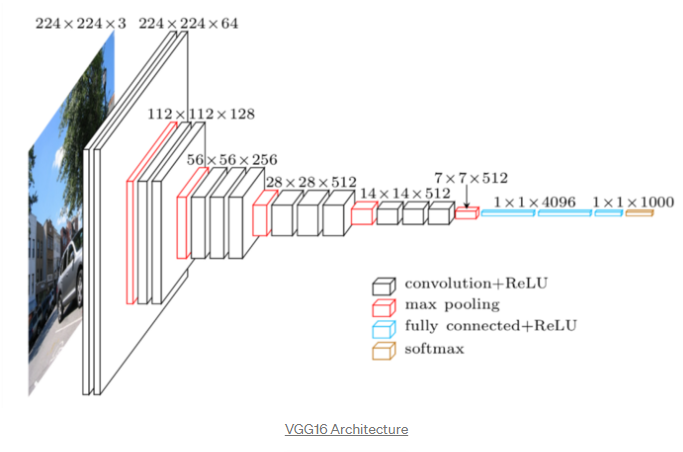

**Preparing the dataset**

In [25]:
from keras.preprocessing import image
import os,numpy as np

In [26]:
dataset_folder = "dataset/"
label_ref = {"damage":0,"no_damage":1}

In [27]:
img_features = []
label = []
for folder_name in os.listdir(dataset_folder):
  for image_name in os.listdir(dataset_folder+folder_name):
      #reshaping the images to 224x224x3 (same as vgg16)
      try:
        image_array = image.load_img(dataset_folder+folder_name+"/"+image_name,target_size=(224,224))
      except Exception as e:
        print(f"Error loading image {dataset_folder +folder_name +image_name}: {e}")
      image_array = image.img_to_array(image_array)
      img_features.append(image_array)
      label.append(label_ref[folder_name])

In [28]:
img_features = np.array(img_features, dtype="float32")
img_features.shape 

(2000, 224, 224, 3)

In [29]:
label = np.array(label, dtype="int")
label.shape

(2000,)

In [30]:
#train (90 %), test (10 %) datapoints
from sklearn.model_selection import train_test_split
train_x, test_x, train_y, test_y = train_test_split(img_features, label, test_size=0.10, random_state=42)

In [31]:
train_x.shape, test_x.shape, train_y.shape, test_y.shape

((1800, 224, 224, 3), (200, 224, 224, 3), (1800,), (200,))

**Feature extraction**

In [32]:
import keras, pandas as pd
from keras.layers import Dense, Dropout, Activation
from keras.models import Sequential
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.applications.vgg16 import decode_predictions

In [33]:
#loading VGG16 model weights
model_vgg = VGG16(weights='imagenet', include_top=False)

In [34]:
train_x = preprocess_input(train_x)
train_x.shape

(1800, 224, 224, 3)

In [35]:
#Extracting features from the train dataset using the VGG16 pre-trained model
train_x=model_vgg.predict(train_x)
train_x.shape 

57/57 [==============================] - 162s 3s/step


(1800, 7, 7, 512)

In [36]:
#reshaping the input image to 25088 (7*7*512)
train_x = train_x.reshape(train_x.shape[0],25088)

In [37]:
#performing one-hot encoding for the target variable
train_y = pd.get_dummies(train_y)
train_y = np.array(train_y)

In [38]:
train_x.shape, train_y.shape

((1800, 25088), (1800, 2))

**Training the Multilayer perceptron and using it after 7x7x512 max pooling layer**

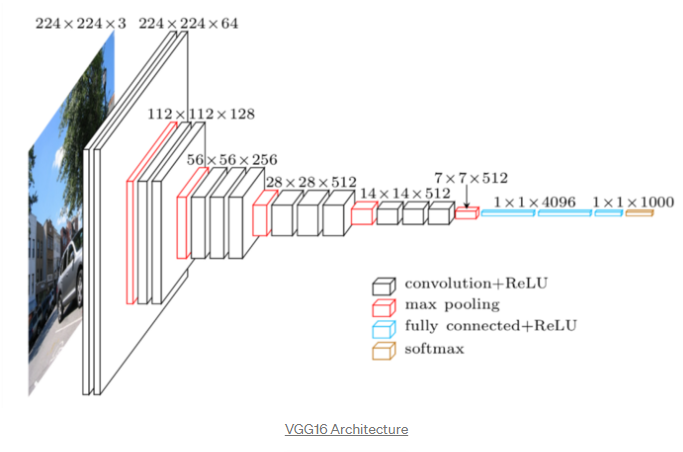

In [39]:
model = Sequential()
model.add(Dense(1000, input_dim=25088, activation='relu',kernel_initializer='uniform'))
# keras.layers.core.Dropout(0.3, noise_shape=None, seed=None)
model.add(Dropout(0.3))

model.add(Dense(500,input_dim=1000,activation='sigmoid'))
# keras.layers.core.Dropout(0.4, noise_shape=None, seed=None)
model.add(Dropout(0.4))

model.add(Dense(150,input_dim=500,activation='sigmoid'))
# keras.layers.core.Dropout(0.2, noise_shape=None, seed=None)
model.add(Dropout(0.2))

model.add(Dense(units=2))
model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy', optimizer="adam", metrics=['accuracy'])

In [40]:
#train the model
model.fit(train_x, train_y, epochs=25, batch_size=64)

Epoch 1/25


29/29 [==============================] - 4s 97ms/step - loss: 0.3921 - accuracy: 0.8172
Epoch 2/25
29/29 [==============================] - 3s 93ms/step - loss: 0.1124 - accuracy: 0.9633
Epoch 3/25
29/29 [==============================] - 3s 91ms/step - loss: 0.0359 - accuracy: 0.9872
Epoch 4/25
29/29 [==============================] - 3s 91ms/step - loss: 0.0103 - accuracy: 0.9989
Epoch 5/25
29/29 [==============================] - 3s 98ms/step - loss: 0.0040 - accuracy: 0.9994
Epoch 6/25
29/29 [==============================] - 3s 91ms/step - loss: 0.0019 - accuracy: 1.0000
Epoch 7/25
29/29 [==============================] - 3s 90ms/step - loss: 8.8715e-04 - accuracy: 1.0000
Epoch 8/25
29/29 [==============================] - 3s 92ms/step - loss: 5.3682e-04 - accuracy: 1.0000
Epoch 9/25
29/29 [==============================] - 3s 92ms/step - loss: 6.4507e-04 - accuracy: 1.0000
Epoch 10/25
29/29 [==============================] - 3s 110ms/step - loss: 3.8806e-04 - accuracy: 1.0000
Epo

In [41]:
#saving model
model.save('image_classification_model/')

INFO:tensorflow:Assets written to: image_classification_model/assets


INFO:tensorflow:Assets written to: image_classification_model/assets


**Evalution on test datapoints**

In [42]:
len(test_x),len(test_y)

(200, 200)

In [43]:
test_x = preprocess_input(test_x)
test_x.shape

(200, 224, 224, 3)

In [44]:
#Extracting features from the train dataset using the VGG16 pre-trained model
test_x = model_vgg.predict(test_x)
test_x.shape 

7/7 [==============================] - 19s 3s/step


(200, 7, 7, 512)

In [45]:
#reshaping the input image to 25088 (7*7*512)
test_x = test_x.reshape(test_x.shape[0],25088)

In [46]:
#performing one-hot encoding for the target variable
test_y=pd.get_dummies(test_y)
test_y=np.array(test_y)

In [47]:
test_x.shape, test_y.shape

((200, 25088), (200, 2))

In [48]:
#test accuracy
model.evaluate(test_x,test_y)

7/7 [==============================] - 0s 10ms/step - loss: 0.1780 - accuracy: 0.9750


[0.17800383269786835, 0.9750000238418579]